<table width=100%>
    <tr>
        <td width = 40% align = "left">
            <h3> MTH786 Machine Learning with Python</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Semester A </h3>
        </td>
    </tr>
    <tr>
        <td width = 40% align = "left">
            <h3> Coursework 5</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Dr Nicola Perra </h3>
        </td>
    </tr>
</table>

We start by loading necessary libraries, including NumPy (used for linear algebra calculations) and MatPlotLib (used for visualisation).

In [23]:
StudentID = 140474758

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Polynomial regression
By completing this exercise you will write a set of functions that are used for building a polynomial regression for a given data samples. You will then learn how to select an optimal degree of the polynomial regression.

1. Implement function **polynomial_basis** hat computes (and outputs) the polynomial data matrix $\Phi\left(\mathbf{X}\right)$ defined as
$$
\Phi\left(\mathbf{X}\right) = 
\begin{pmatrix}
1 & \left(x^{(1)}\right)^1 & \left(x^{(1)}\right)^2 & \ldots & \left(x^{(1)}\right)^d \\
1 & \left(x^{(2)}\right)^1 & \left(x^{(2)}\right)^2 & \ldots & \left(x^{(2)}\right)^d \\
\vdots & \vdots & \vdots & \ddots & \vdots & \\
1 & \left(x^{(s)}\right)^1 & \left(x^{(s)}\right)^2 & \ldots & \left(x^{(s)}\right)^d 
\end{pmatrix}
$$
The function **polynomial_basis**
should take the $2$ arguments
- NumPy array *data_inputs* representing a list of one-dimensional inputs $x^{(1)}, x^{(2)}, \ldots, x^{(s)}$
- and integer *degree* representing the degree $d$ of a polynomial.

In [25]:
def polynomial_basis(data_inputs, degree):
    data_matrix = np.ones((len(data_inputs), 1))
    for i in range(degree):
        data_matrix = np.c_[data_matrix, np.power(data_inputs, i + 1)]
    return data_matrix


Test your function with the following unit tests

In [26]:
from numpy.testing import assert_array_almost_equal, assert_array_equal
test_inputs = np.array([1, 2, 3, 4])
test_degree = 2;
assert_array_equal(polynomial_basis(test_inputs, test_degree), np.array([[1, 1, 1], [1, 2, 4], [1, 3, 9], [1, 4, 16]]))

In [27]:
test_inputs = np.array([1, 2, 3, 4])
test_degree = 0;
assert_array_equal(polynomial_basis(test_inputs, test_degree), np.array([[1], [1], [1], [1]]))

Try your function with these data

In [28]:
test_samples = np.random.randint(low = 2, high = 10)
test_inputs = np.random.rand(test_samples)
test_degree = np.random.randint(low = 2, high = 10)

polynomial_basis(test_inputs, test_degree)

array([[1.00000000e+00, 5.00474956e-01, 2.50475181e-01, 1.25356555e-01,
        6.27378165e-02],
       [1.00000000e+00, 8.52748185e-01, 7.27179467e-01, 6.20100971e-01,
        5.28789977e-01],
       [1.00000000e+00, 3.89264326e-01, 1.51526716e-01, 5.89839449e-02,
        2.29603456e-02],
       [1.00000000e+00, 1.82670369e-01, 3.33684638e-02, 6.09542962e-03,
        1.11345438e-03],
       [1.00000000e+00, 7.22524728e-01, 5.22041983e-01, 3.77188242e-01,
        2.72527832e-01],
       [1.00000000e+00, 4.34911556e-02, 1.89148062e-03, 8.22626778e-05,
        3.57769892e-06],
       [1.00000000e+00, 2.43636895e-01, 5.93589365e-02, 1.44620270e-02,
        3.52348334e-03],
       [1.00000000e+00, 6.72696034e-02, 4.52519955e-03, 3.04408379e-04,
        2.04774309e-05],
       [1.00000000e+00, 1.73852429e-01, 3.02246669e-02, 5.25463175e-03,
        9.13530490e-04]])

2. Write a function **polynomial_regression** that takes two arguments *data_matrix* and *data_outputs*, which computes and returns the solution $\hat{\mathbf{W}}$ of the normal equation
$$
\Phi^{\top}\left(\mathbf{X}\right)\Phi\left(\mathbf{X}\right) \hat{\mathbf{W}} = \Phi^{\top}\left(\mathbf{X}\right)\mathbf{Y}
$$
Here $\Phi\left(\mathbf{X}\right)$  is the mathematical representation of *data_matrix*
and $\mathbf{Y}$ is the mathematical representation of *data_outputs*, while $\hat{\mathbf{W}}$ is a mathematical representation for coefficients of the polynomial regression.

In [29]:
def polynomial_regression(data_matrix, data_outputs):
    return np.linalg.solve(data_matrix.T @ data_matrix, data_matrix.T @ data_outputs)

Test your function with the following unit tests

In [30]:
test_inputs = np.array([0, 1/4, 1/2, 3/4, 1])
test_outputs = np.array([0, 1, 0, -1, 0])
test_degree = 1
test_data_matrix = polynomial_basis (test_inputs, test_degree)
assert_array_almost_equal(polynomial_regression(test_data_matrix, test_outputs), np.array([2/5, -4/5]))

In [31]:
test_inputs = np.array([0, 1/4, 1/2, 3/4, 1])
test_outputs = np.array([0, 1, 0, -1, 0])
test_degree = 3
test_data_matrix = polynomial_basis (test_inputs, test_degree)
assert_array_almost_equal(polynomial_regression(test_data_matrix, test_outputs), np.array([0, 32/3, -32, 64/3]))

3. Write a function **prediction_function** that evaluates your predicted polynomial function at the given points $\mathbf{X} = 
\left\{x^{(1)}, x^{(2)}, \ldots, x^{(s)}\right\}$ for given coefficients $\mathbf{w} = \left(w^{(0)}, w^{(1)},\ldots,w^{(d)}\right)$. The function **prediction_function** takes the arguments _data_matrix_ and _weights_ as inputs and returns a value of the polynomial prediction function evaluated for every $x \in \mathbf{X}$ via
$$
f_{\mathbf{W}}\left(x\right)
= w^{(0)}+w^{(1)}x+\ldots+w^{(d)}x^d,
$$
where _data_matrix_ is a NumPy array representing data matrix $\Phi\left(\mathbf{X}\right)$, _weights_ is a NumPy representation of coefficients vector $\mathbf{w}$. The function should return a vector of the polynomial values $\left(f_{\mathbf{w}}\left(x^{(1)}\right), f_{\mathbf{w}}\left(x^{(2)}, \ldots, f_{\mathbf{w}}\left(x^{(s)}\right)\right)\right)^{\top}$.

In [32]:
def prediction_function(data_matrix, weights):
    return data_matrix@weights

Test your function with the following unit tests

In [33]:
test_inputs = np.array([0, 1/4, 1/2, 3/4, 1])
test_weights = np.array([2/5, -4/5])
test_data_matrix = polynomial_basis(test_inputs, len(test_weights)-1)
assert_array_almost_equal(prediction_function(test_data_matrix, test_weights), np.array([0.4, 0.2, 0, -0.2, -0.4]))

In [34]:
test_inputs = np.array([0, 1/4, 1/2, 3/4, 1])
test_weights = np.array([0, 32/3, -32, 64/3])
test_data_matrix = polynomial_basis(test_inputs, len(test_weights)-1)
assert_array_almost_equal(prediction_function(test_data_matrix, test_weights), np.array([0, 1, 0, -1, 0]))

4. Write a function **prediction_error** that evaluates a mean-squared error over the set of data inputs and outputs. The function **prediction_error** takes the arguments _data_matrix_, _data_outputs_ and _weights_ as inputs and returns a mean squared error defined by
$$
\mathrm{MSE} = \frac{1}{2s} \left\|\Phi\left(\mathbf{X}\right)\mathbf{W} - \mathbf{Y} \right\|^2,
$$
where $\Phi\left(\mathbf{X}\right)$ is a mathematical representation of _data_matrix_, $\mathbf{Y}$ is a mathematical representation of _data_outputs_ and $\mathbf{W}$ is a mathematical representation of _weights_.

In [35]:
def prediction_error(data_matrix,data_outputs,weights):
    s = len(data_matrix)
    inside = data_matrix@weights - data_outputs
    return 1/(2*s) * np.linalg.norm(inside)**2


Test your function with the following unit tests

In [36]:
# Calculate MSE given X, y, and w

test_inputs = np.array([0, 1/4, 1/2, 3/4, 1])
test_data_outputs = np.array([0, 1, 0, -1, 0])
test_weights = np.array([2/5, -4/5])
test_data_matrix = polynomial_basis(test_inputs, len(test_weights)-1)

assert_array_almost_equal(prediction_error(test_data_matrix, test_data_outputs, test_weights), 0.16)

In [37]:
test_inputs = np.array([0, 1/4, 1/2, 3/4, 1])
test_data_outputs = np.array([0, 1, 0, -1, 0])
test_weights = np.array([0, 32/3, -32, 64/3])
test_data_matrix = polynomial_basis(test_inputs, len(test_weights)-1)

assert_array_almost_equal(prediction_error(test_data_matrix, test_data_outputs, test_weights), 0)

### Cross-validation and the optimal degree finder
In this part you will first create a dataset we have discussed in the lecture: noisy sine-data. You will then evaluate the optimal polynomial degree by minimising the validation error. At the end of this section you will be asked to plot your optimal polynomial.

5. We start by creating our own dataset by defining a function $f(x) := \sin(2\pi x)$, by sampling the
function at points $\left\{x^{(i)}\right\}_{i=1}^s$ forming an equidistant sequence of points from the interval $\left[0, 1\right]$, and by computing corresponding output samples $y^{(i)} = f\left(x^{(i)}\right)$ for all $1\leq i\leq s$. We then perturb the data with normal distributed random noise with mean zero and variance $\sigma^2$ in order to obtain noisy,
simulated output data samples $\left\{\tilde{y}^{(i)}\right\}_{i=1}^s$. We finish this part by visualising the data points.

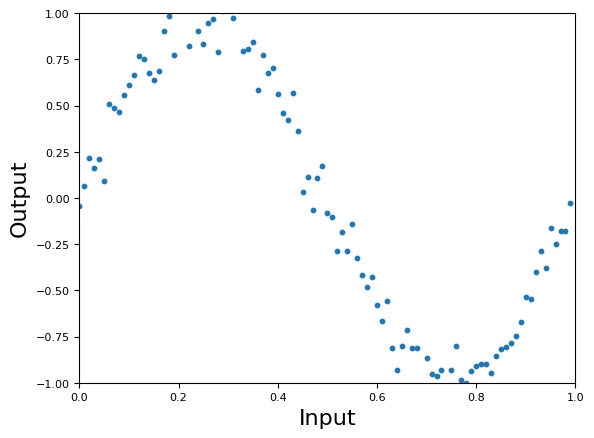

In [38]:
def data_generator(data_inputs, noise_variance):
    """
    sin(2*pi*x) to map interval [0, 1] to graph of sin on [0, 2pi].
    for each point in graph, add some noise. the amount of variance contributed determined by randn (N~(0,1))
    """
    return np.sin(2*np.pi*data_inputs) + (noise_variance)**(1/2)*np.random.randn(len(data_inputs))

data_size = 100
noise_variance = 0.01
data_inputs = np.arange(0,1,1/data_size)
data_outputs = data_generator(data_inputs, noise_variance)

plt.scatter(data_inputs, data_outputs, s = 10)
plt.axis([0,1,-1,1])
plt.xlabel('Input', fontsize=16)
plt.xticks(fontsize=8)
plt.ylabel('Output', fontsize=16)
plt.yticks(fontsize=8)
plt.tight_layout;

6. Write a function **data_split** that performs a data split of a given dataset into two sets; one for testing, and one for cross-validation. Your function should take 2 arguments: _data_matrix_, representing a whole dataset (including inputs and outputs), and a _validation_ratio_ representing a ratio of dataset contained in a validation set. The function **data_split(data_matrix, validation_ratio)** should return two new data matrices, such that their union coincides with complete dataset represented by _data_matrix_.

In [39]:
def data_split(data_matrix, validation_ratio):
    """
    s = len(data_matrix)
    1. Determine size of training and test sets. Maybe just size of test is enough.
        - test_size = int(len(data_matrix) * validation_ratio)
    2. Get test_size random indicies from [0, s - 1]
        - np.random.choice(s, test_size)
    """
    s = len(data_matrix)
    test_size = int(round(s * validation_ratio, 0))

    # Need replace=False since default is sampling with replacement.
    test_ind = np.random.choice(s, test_size, replace=False)
    test_set = data_matrix[test_ind, :]
    
    training_set = np.delete(data_matrix, test_ind, 0)

    return training_set, test_set

Test your results with the following unit tests

In [40]:
# Get dimensions of test data matrix
test_shape = np.random.randint(low = 2, high = 10, size = 2)
# Randomly form test data matrix with above dims
test_data_matrix = np.random.rand(test_shape[0], test_shape[1])
# Use my defined fct to split
test_training, test_validation = data_split(test_data_matrix, 0.2)
# Recombine via np.r_ -> row concat
test_combined_matrix = np.r_[test_training, test_validation]
# Check original data matrix is the same as the union of the training set and test set.
# Both arguments, which are nd-arrays, have rows sorted, depending on the first entry in each row.
# Sort runs over all rows. For each row, key works by telling sort to consider this row's new position by it's first entry.
assert_array_almost_equal(sorted(test_data_matrix, key=lambda x: x[0]), sorted(test_combined_matrix, key=lambda x: x[0]))

In [41]:
test_shape = np.random.randint(low = 2, high = 10, size = 2)
test_data_matrix = np.random.rand(test_shape[0], test_shape[1])
test_training, test_validation = data_split(test_data_matrix, np.random.rand())
test_combined_matrix = np.r_[test_training, test_validation]
assert_array_almost_equal(sorted(test_data_matrix, key=lambda x: x[0]), sorted(test_combined_matrix, key=lambda x: x[0]))

7. Write a function **grid_search** that performs a search for a minimum value of a given function on a given grid points. You function should have a signature *grid_search (objective, grid)*, where *objective* is a function to minimise and *grid* is a list of grid points. The function should return the grid point with the minimal value of objective function.

In [42]:
def grid_search(objective, grid):
    """
    1. Apply objective fct to grid -> list of outputs
    2. Get argmin of this
    3. index into grids at argmin
    """
    outputs = np.array([])
    for i in grid:
        outputs = np.append(outputs, objective(i))
    min_index = np.argmin(outputs)
    return grid[min_index]

The optimal polynomial has degree 18 and coefficients [-2.01619628e-02  9.12106505e+00 -6.45969127e+01  8.24324199e+02
 -7.46421340e+03  3.46782166e+04 -6.24663355e+04 -9.93646949e+04
  6.77206659e+05 -1.22205799e+06  8.08011487e+05  1.44419114e+05
 -3.40597458e+05  2.83765884e+05 -6.86561321e+05  3.72608705e+05
  6.19492159e+05 -7.49639990e+05  2.27201414e+05].


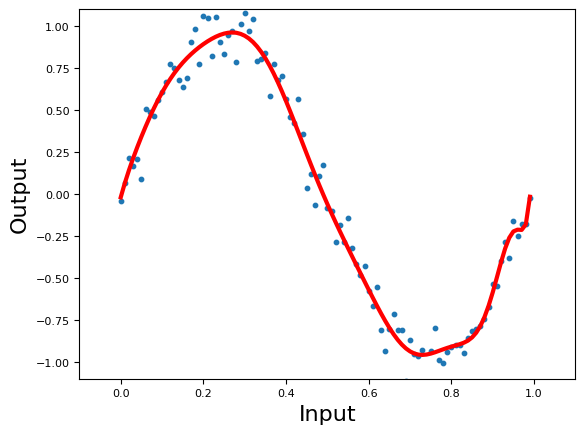

In [43]:
np.random.seed(StudentID)
data_matrix = np.c_[data_inputs, data_outputs]

training_data, validation_data = data_split(data_matrix, 0.2)
# For given d (degree), calculate validation error
# Here, the optimal weights are found by running regression on training_data.
# Notation: 
#   - [:, :-1] -> All rows, all columns except last
#   - [:, -1] -> All rows, only last col
# Then, prediction error found on val_set using these optimal weights

validation_error = lambda d: prediction_error(polynomial_basis(validation_data[:,:-1],d), validation_data[:,-1], \
                                            polynomial_regression(\
                                            polynomial_basis(training_data[:, :-1], d), training_data[:,-1]))
degree_grid = np.arange(0,20,1)
optimal_degree = grid_search(validation_error, degree_grid)
optimal_weights = polynomial_regression(polynomial_basis(training_data[:,:-1],optimal_degree),training_data[:,-1])
polynomial_values = prediction_function(polynomial_basis(data_inputs,optimal_degree), optimal_weights)

plt.scatter(data_inputs, data_outputs, s = 10)
plt.plot(data_inputs, polynomial_values, linewidth = 3, c = 'r')
plt.axis([-0.1,1.1,-1.1,1.1])
plt.xlabel('Input', fontsize=16)
plt.xticks(fontsize=8)
plt.ylabel('Output', fontsize=16)
plt.yticks(fontsize=8)
plt.tight_layout;

print("The optimal polynomial has degree {} and coefficients {}.".format(optimal_degree, optimal_weights))